In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/numerical 1.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB
None
       Group Customer_Segment  Sales_Before  Sales_After  \
0    Control       High Value    240.548359   300.007568   
1  Treatment       High Value    246.862114   381.337555   
2    Control       High Value    156.978084   179.330464   
3    Control     Medium Value    192.126708   229.278031   
4  

In [ ]:
#checking missing values(null values)
print(df.isnull().sum())

Group                           1401
Customer_Segment                1966
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Purchase_Made                    805
dtype: int64


In [ ]:
# Check the percentage of missing values
print((df.isnull().sum() / len(df)) * 100)

Group                           14.01
Customer_Segment                19.66
Sales_Before                    15.22
Sales_After                      7.67
Customer_Satisfaction_Before    16.70
Customer_Satisfaction_After     16.40
Purchase_Made                    8.05
dtype: float64


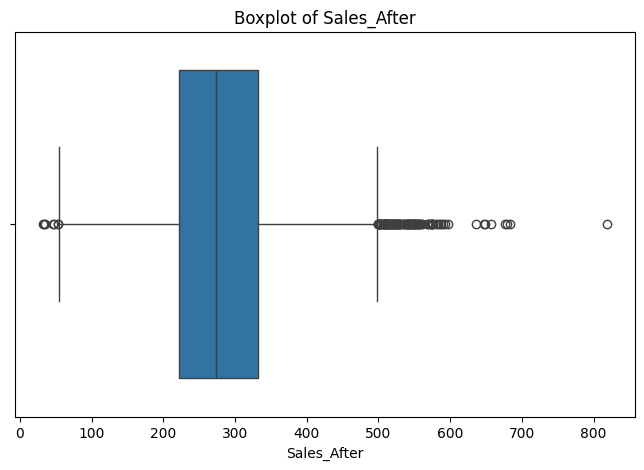

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplot for  Sales_After
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Sales_After"])
plt.title("Boxplot of Sales_After")
plt.show()

In [ ]:
Q1 = df["Sales_After"].quantile(0.25)
Q3 = df["Sales_After"].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df[(df["Sales_After"] >= lower_bound) & (df["Sales_After"] <= upper_bound)]

print("Original dataset size:", len(df))
print("New dataset size after outlier removal:", len(df_clean))

Original dataset size: 10000
New dataset size after outlier removal: 9113


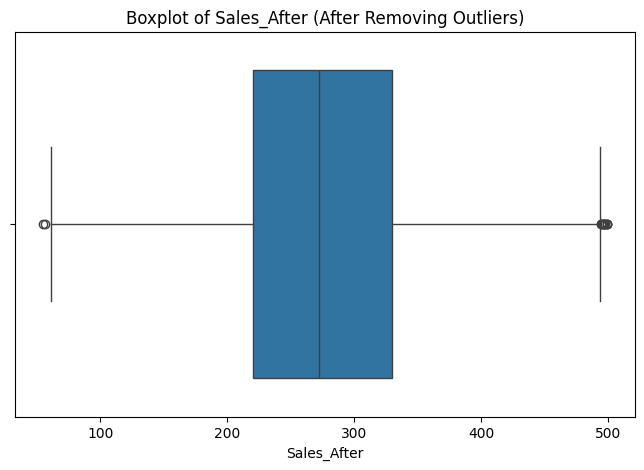

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
Q1 = df["Sales_After"].quantile(0.25)
Q3 = df["Sales_After"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df["Sales_After"] >= lower_bound) & (df["Sales_After"] <= upper_bound)]

# Boxplot after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean["Sales_After"])
plt.title("Boxplot of Sales_After (After Removing Outliers)")
plt.show()

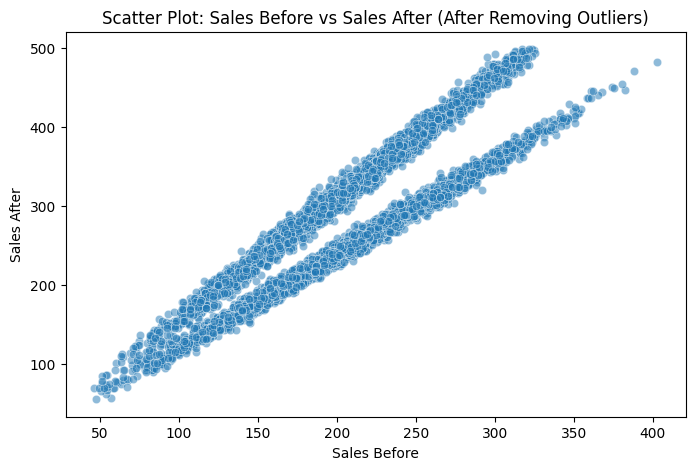

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove outliers using IQR
Q1 = df["Sales_After"].quantile(0.25)
Q3 = df["Sales_After"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df["Sales_After"] >= lower_bound) & (df["Sales_After"] <= upper_bound)]

# Scatter plot of Sales_Before vs Sales_After
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_clean["Sales_Before"], y=df_clean["Sales_After"], alpha=0.5)
plt.xlabel("Sales Before")
plt.ylabel("Sales After")
plt.title("Scatter Plot: Sales Before vs Sales After (After Removing Outliers)")
plt.show()

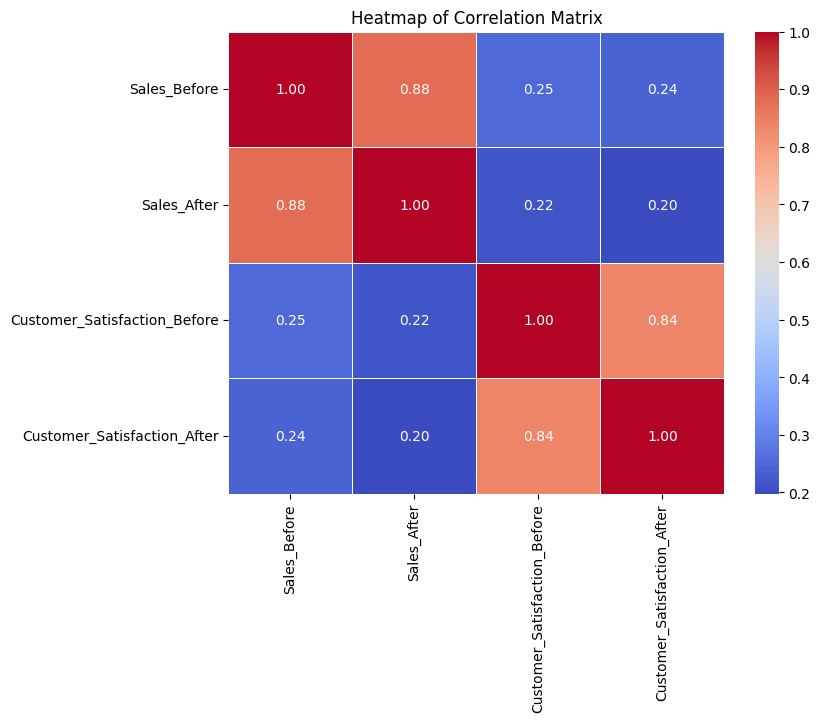

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove outliers using IQR
Q1 = df["Sales_After"].quantile(0.25)
Q3 = df["Sales_After"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df["Sales_After"] >= lower_bound) & (df["Sales_After"] <= upper_bound)]

# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=['number'])

# Compute correlation matrix on numeric columns only
corr_matrix = numeric_df.corr()

#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [ ]:
#LINEAR REGRESSION
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

file_path = "/content/numerical 1.csv"
df = pd.read_csv(file_path)

df = df.dropna(subset=["Sales_After"])

X = df.drop(columns=["Sales_After"])
y = df["Sales_After"]

num_features = X.select_dtypes(include=["float64", "int64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1303.5985110083798


In [ ]:
#SVM(SUPPORT VECTOR MACHINE)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

file_path = "/content/numerical 1.csv"
df = pd.read_csv(file_path)

df = df.dropna(subset=["Sales_After"])

X = df.drop(columns=["Sales_After"])
y = df["Sales_After"]


num_features = X.select_dtypes(include=["float64", "int64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", SVR(kernel="rbf"))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1753.2393641128733


In [ ]:
#RANDOM FOREST
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

file_path = "/content/numerical 1.csv"
df = pd.read_csv(file_path)

df = df.dropna(subset=["Sales_After"])

X = df.drop(columns=["Sales_After"])
y = df["Sales_After"]

num_features = X.select_dtypes(include=["float64", "int64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore")) #sparse=False for RandomForest
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1416.7561404585429


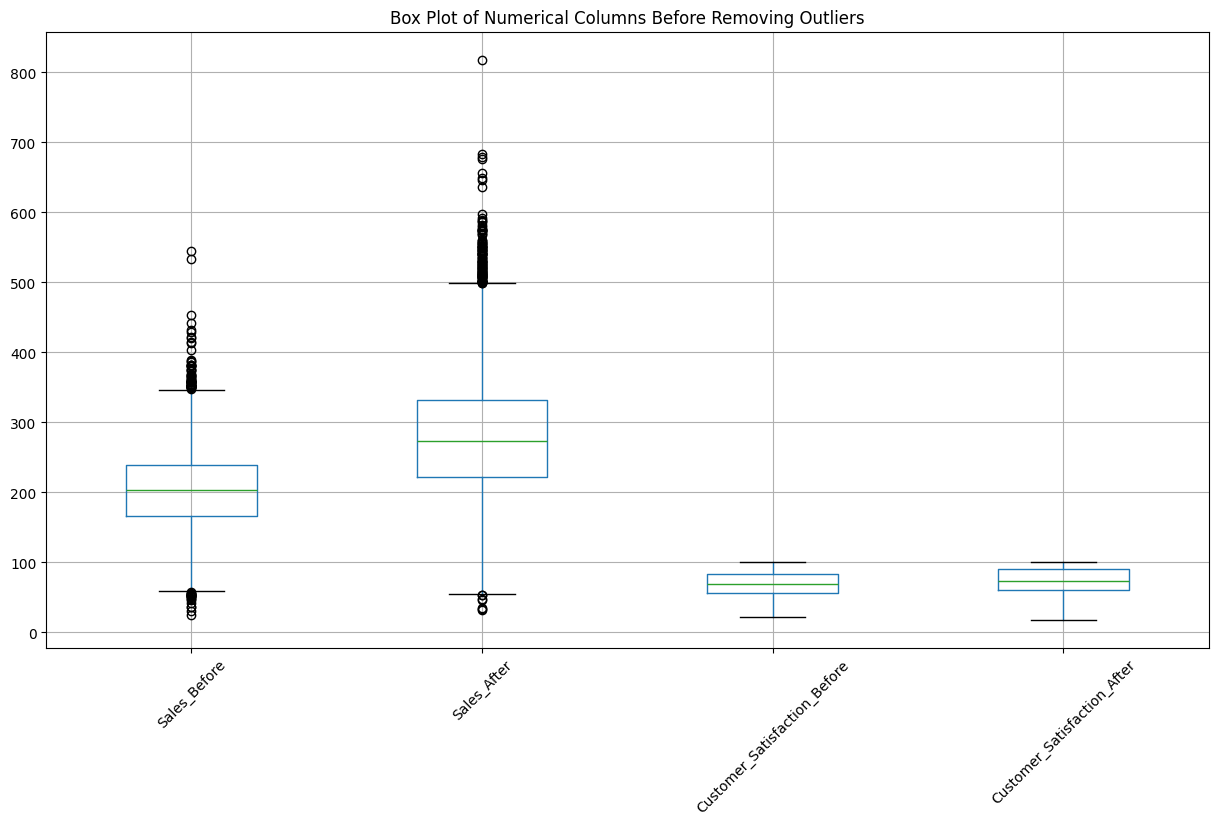

In [ ]:
#BOX PLOT FOR ALL COLUMNS BEFORE REMOVING OUTLIERS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/numerical 1.csv"
df = pd.read_csv(file_path)

numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=45)
plt.title("Box Plot of Numerical Columns Before Removing Outliers")
plt.show()

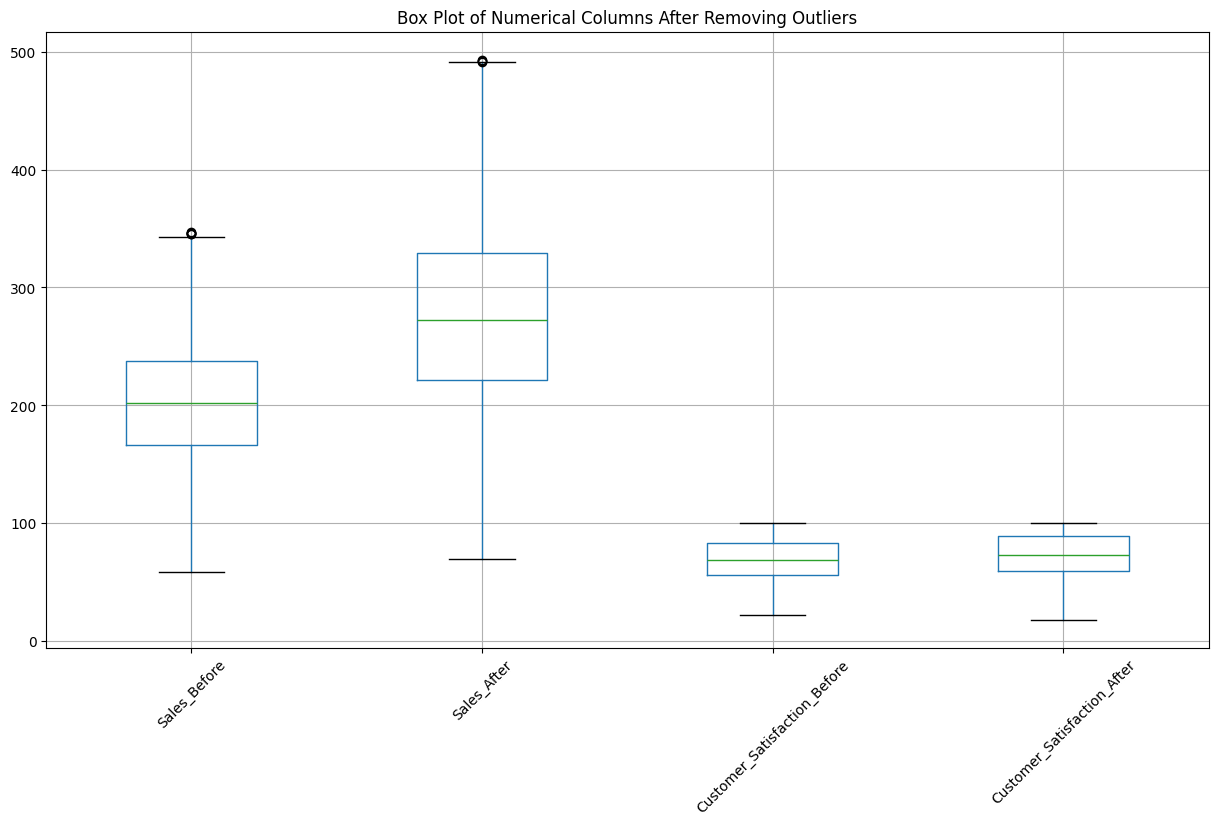

In [ ]:
#box plots for all numerical columns after removing outliers
import pandas as pd
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['number']).columns

def remove_outliers_iqr(data, columns):
    df_filtered = data.copy()
    for col in columns:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    return df_filtered

df_cleaned = remove_outliers_iqr(df, numerical_cols)

plt.figure(figsize=(15, 8))
df_cleaned[numerical_cols].boxplot(rot=45)
plt.title("Box Plot of Numerical Columns After Removing Outliers")
plt.show()

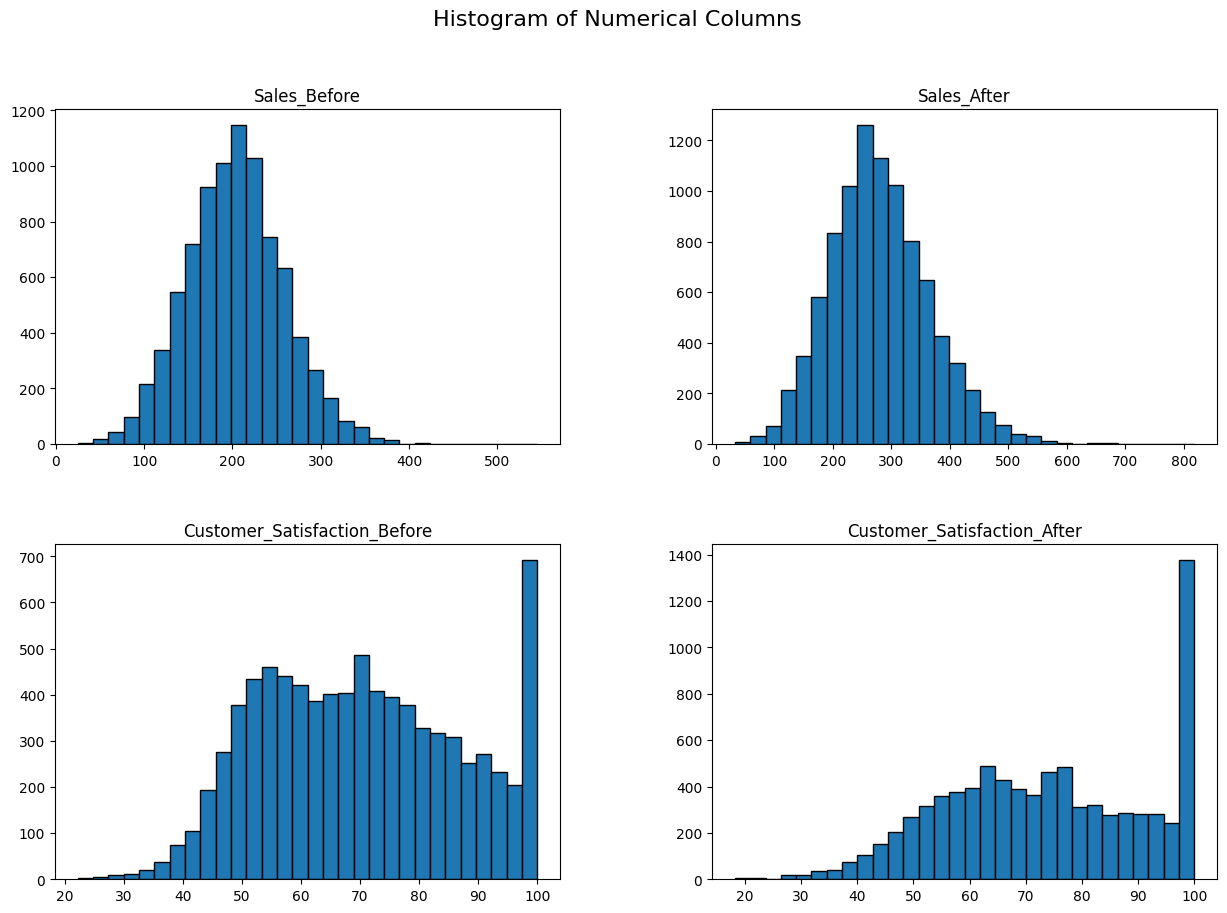

In [ ]:
#HISTOGRAM OF ALL NUMERICAL COLUMNS
import pandas as pd
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['number']).columns

df[numerical_cols].hist(figsize=(15, 10), bins=30, edgecolor='black', grid=False)
plt.suptitle("Histogram of Numerical Columns", fontsize=16)
plt.show()

In [ ]:
#SKEWNESS OF ALL NUMERICAL COLUMNS
import pandas as pd

numerical_cols = df.select_dtypes(include=['number']).columns

skewness_values = df[numerical_cols].skew()

print("Skewness of Numerical Columns:")
print(skewness_values)

Skewness of Numerical Columns:
Sales_Before                    0.226509
Sales_After                     0.451744
Customer_Satisfaction_Before    0.117870
Customer_Satisfaction_After    -0.112185
dtype: float64


In [ ]:
#KURTOSIS OF ALL NUMERICAL COLUMNS
import pandas as pd

numerical_cols = df.select_dtypes(include=['number']).columns

kurtosis_values = df[numerical_cols].kurtosis()

print("Kurtosis of Numerical Columns:")
print(kurtosis_values)

Kurtosis of Numerical Columns:
Sales_Before                    0.466278
Sales_After                     0.533776
Customer_Satisfaction_Before   -0.908301
Customer_Satisfaction_After    -0.929099
dtype: float64


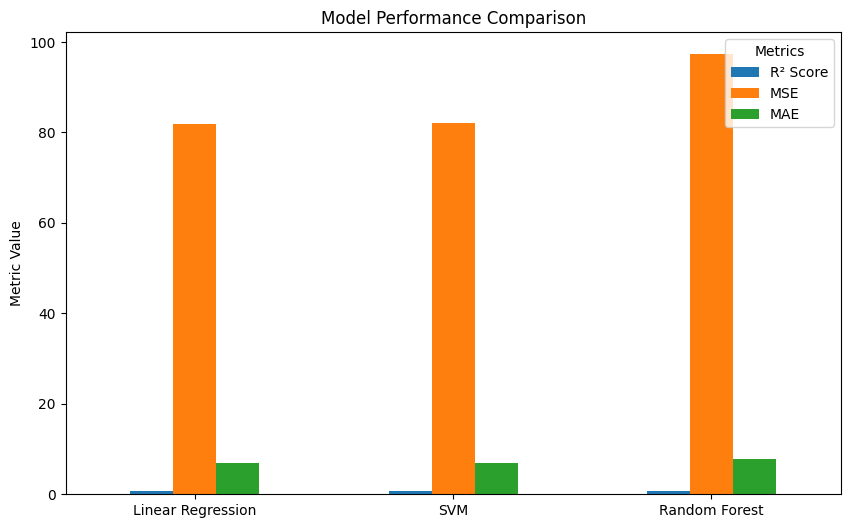

In [ ]:
#COMPARISION PLOT OF ALL RESULTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

numerical_cols = df.select_dtypes(include=['number']).columns
df = df.dropna()

X = df[numerical_cols].drop(columns=numerical_cols[-1])
y = df[numerical_cols[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(kernel='linear'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = [r2, mse, mae]

results_df = pd.DataFrame(results, index=["R² Score", "MSE", "MAE"])

results_df.T.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()